In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
worker_name = 'default_worker'
df = pd.read_csv('{worker_name}.csv')
df = df.astype({'start_train': 'datetime64[us]', 'finish_train': 'datetime64[us]'})
df

,data,fold,model,start_train,finish_train,p@5,p@10,p@20,r@5,r@10,r@20,g@5,g@10,g@20
0,ebnerd_demo,1,FairGANModel,2025-01-01 14:29:16.936500,2025-01-01 14:41:13.862487,0.078493,0.072292,0.062834,0.019794,0.035143,0.059483,0.079338,0.078139,0.078622
1,ebnerd_demo,2,FairGANModel,2025-01-01 14:41:20.601533,2025-01-01 14:53:26.766077,0.078493,0.069859,0.063501,0.021355,0.033288,0.057479,0.082133,0.078029,0.080235
2,ebnerd_demo,3,FairGANModel,2025-01-01 14:53:33.522830,2025-01-01 15:05:39.208015,0.083987,0.077159,0.067308,0.020251,0.036429,0.061303,0.087667,0.084846,0.085302
3,ebnerd_demo,4,FairGANModel,2025-01-01 15:05:45.869617,2025-01-01 15:17:43.729124,0.078493,0.073155,0.063854,0.021365,0.037533,0.059576,0.080457,0.079837,0.080602
4,ebnerd_demo,5,FairGANModel,2025-01-01 15:17:50.490464,2025-01-01 15:29:50.442532,0.080534,0.070251,0.063187,0.019297,0.032945,0.058072,0.085721,0.079457,0.080561
5,ebnerd_demo,1,DiffModel,2025-01-01 15:29:57.119466,2025-01-01 15:32:28.471884,0.038619,0.036656,0.032221,0.005823,0.011233,0.019000,0.045451,0.042254,0.039176
6,ebnerd_demo,2,DiffModel,2025-01-01 15:32:46.980800,2025-01-01 15:35:12.634769,0.037520,0.039717,0.036185,0.004955,0.012641,0.021977,0.035361,0.038090,0.037999
7,ebnerd_demo,3,DiffModel,2025-01-01 15:35:30.958684,2025-01-01 15:37:59.372101,0.030298,0.033124,0.035518,0.005599,0.011418,0.023356,0.032134,0.034343,0.038210
8,ebnerd_demo,4,DiffModel,2025-01-01 15:38:17.900269,2025-01-01 15:40:50.293441,0.037834,0.041601,0.037402,0.006450,0.013866,0.025411,0.036905,0.040498,0.040689
9,ebnerd_demo,5,DiffModel,2025-01-01 15:41:08.556841,2025-01-01 15:43:39.730355,0.028414,0.028414,0.029239,0.004181,0.008731,0.018747,0.030463,0.030140,0.032091


In [36]:
df["time"] = df["finish_train"] - df["start_train"]
df["time"] = df["time"].dt.total_seconds()
df_bartime = df[["fold","model","time"]]
df_bartime

,fold,model,time
0,1,FairGANModel,716.925987
1,2,FairGANModel,726.164544
2,3,FairGANModel,725.685185
3,4,FairGANModel,717.859507
4,5,FairGANModel,719.952068
5,1,DiffModel,151.352418
6,2,DiffModel,145.653969
7,3,DiffModel,148.413417
8,4,DiffModel,152.393172
9,5,DiffModel,151.173514


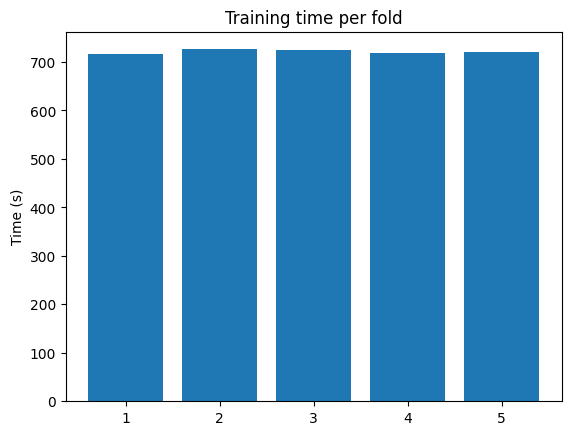

In [ ]:
# barchart every x fold, y time, label model
plt.figure()
plt.bar(df_bartime["fold"], df_bartime["time"])
plt.ylabel('Time (s)')
plt.title('Training time per fold')
plt.savefig('training_time_per_fold.png')
plt.show()




In [20]:

df.groupby(["data","model"],as_index=False).agg({"time":"mean" ,"p@5":"mean","p@10":"mean","p@20":"mean","r@5":"mean","r@10":"mean","r@20":"mean","g@5":"mean","g@10":"mean","g@20":"mean"})

,data,model,time,p@5,p@10,p@20,r@5,r@10,r@20,g@5,g@10,g@20
0,ebnerd_demo,DiffModel,149.797298,0.034537,0.035903,0.034113,0.005402,0.011578,0.021698,0.036063,0.037065,0.037633
1,ebnerd_demo,FairGANModel,721.317458,0.080000,0.072543,0.064137,0.020412,0.035068,0.059183,0.083063,0.080061,0.081064
